MODELO DE CLASIFICACIÓN

In [1]:
# ============================================
# 03 - MODELO DE CLASIFICACIÓN
# Proyecto: MOCACI - Modelo de Clasificación de Amenazas Cibernéticas
# ============================================

# --------- MONTAR GOOGLE DRIVE ----------
from google.colab import drive
drive.mount('/content/drive')

# --------- IMPORTAR LIBRERÍAS ----------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

import joblib

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# --------- CARGAR DATASET PROCESADO ----------
file_path = '/content/drive/MyDrive/Colab_Notebooks/Modulo 4/mocaci/data/processed/amenazas_ciberseguridad_prepared.csv'

df = pd.read_csv(file_path)
print("Dataset procesado cargado correctamente.\n")
df.head()


Mounted at /content/drive
Dataset procesado cargado correctamente.



,country,protocol,port,packet_size,duration_sec,vpn_connection,firewall_action,cloudflare_flag,endpoint_detected,user_id,service_target,year,month,day,hour,threat_type
0,1,2,53,0.591476,2.68,0,allow,0,0,640,Portal de constancias,2021,2,21,0,7
1,2,0,53,-1.218444,0.14,0,allow,0,0,430,Portal de constancias,2020,3,16,0,1
2,2,4,443,-1.698384,2.93,0,allow,0,0,214,Web institucional,2019,6,29,0,7
3,3,4,80,0.990232,0.97,0,allow,0,0,92,Web institucional,2022,4,18,0,5
4,4,4,110,1.410477,0.23,0,allow,0,1,508,Portal de constancias,2024,9,24,0,0


🎯 1. Separar Features (X) y Target (y)

In [8]:
# One-hot encode all categorical (object type) columns
categorical_cols = df.select_dtypes(include=['object']).columns
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df_processed.drop(columns=["threat_type"])
y = df_processed["threat_type"]

X.shape, y.shape

((3000, 18), (3000,))

🔀 2. Train/Test Split (80/20)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (2400, 18)
X_test: (600, 18)
y_train: (2400,)
y_test: (600,)


🌲 3. Entrenar Modelo Random Forest (Baseline sólido)

In [13]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)
print("Modelo entrenado correctamente.")

Modelo entrenado correctamente.


📊 4. Predicciones y Métricas

In [12]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Accuracy del modelo: {accuracy:.4f}\n")

print("📋 Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))



🎯 Accuracy del modelo: 0.1317

📋 Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.12      0.09      0.11        75
           1       0.16      0.15      0.15        75
           2       0.13      0.16      0.15        75
           3       0.13      0.12      0.13        75
           4       0.14      0.13      0.13        75
           5       0.15      0.15      0.15        75
           6       0.15      0.16      0.15        75
           7       0.08      0.09      0.08        75

    accuracy                           0.13       600
   macro avg       0.13      0.13      0.13       600
weighted avg       0.13      0.13      0.13       600



🔥 5. Matriz de Confusión

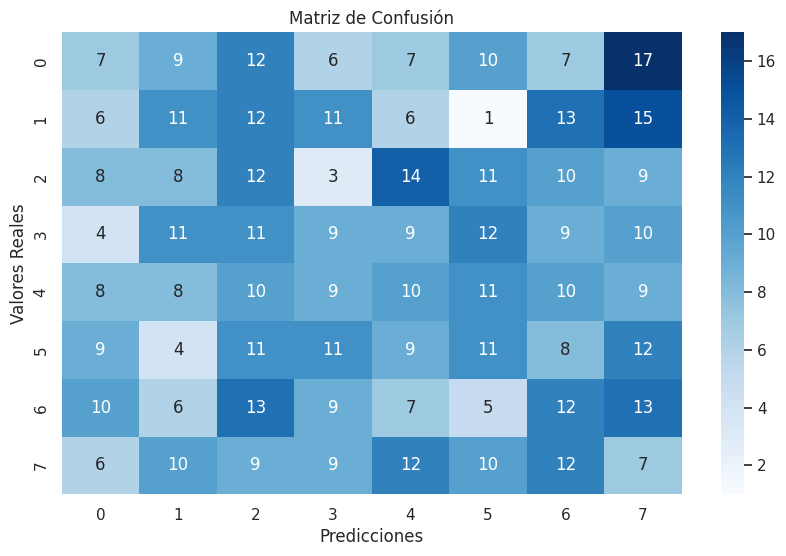

In [14]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()


💾 6. Guardar el Modelo Entrenado

In [15]:
model_path = "/content/drive/MyDrive/Colab_Notebooks/Modulo 4/mocaci/models/random_forest_mocaci.pkl"

joblib.dump(model, model_path)

print(f"Modelo guardado en:\n{model_path}")

Modelo guardado en:
/content/drive/MyDrive/Colab_Notebooks/Modulo 4/mocaci/models/random_forest_mocaci.pkl


🧪 7. Probar una Predicción de Ejemplo

In [16]:
sample = X_test.iloc[0:1]  # primer registro de prueba
pred = model.predict(sample)

print("Registro usado para prueba:")
display(sample)
print("Predicción (threat_type codificado):", pred[0])

Registro usado para prueba:


,country,protocol,port,packet_size,duration_sec,vpn_connection,cloudflare_flag,endpoint_detected,user_id,year,month,day,hour,firewall_action_allow,firewall_action_deny,service_target_Portal de constancias,service_target_Sistema de óptica,service_target_Web institucional
1148,3,2,53,1.477335,0.3,0,0,0,651,2021,7,11,0,True,False,False,True,False


Predicción (threat_type codificado): 5
